# Assignment - 4

In [ ]:
pip install ucimlrepo

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import (
    rand_score,
    adjusted_rand_score,
    mutual_info_score,
    adjusted_mutual_info_score,
    normalized_mutual_info_score
)


In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

# metadata
print(iris.metadata)

# variable information
print(iris.variables)


{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'ID': 191, 'type': 'NATIVE', 'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'venue': 'Significance, 2021', 'year': 2021, 'journal': 'Significance, 2021', 'DOI': '1740-9713.01589', 'URL': 'https://www.semanticscholar.org

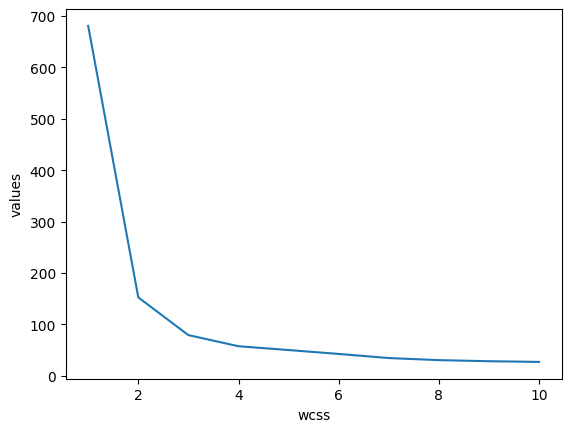

In [ ]:
from sklearn.cluster import KMeans;
wcss=[];
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init="k-means++",random_state=0);
  kmeans.fit(X);
  wcss.append(kmeans.inertia_);
plt.plot(range(1,11),wcss);
plt.xlabel('wcss');
plt.ylabel('values');
plt.show();

In [ ]:
kmeans=KMeans(n_clusters=3,init="k-means++",random_state=0);#indexing of clusters begin form 0
pred=kmeans.fit_predict(X);#this method not only trains but also provide cluster number.
print(pred);

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


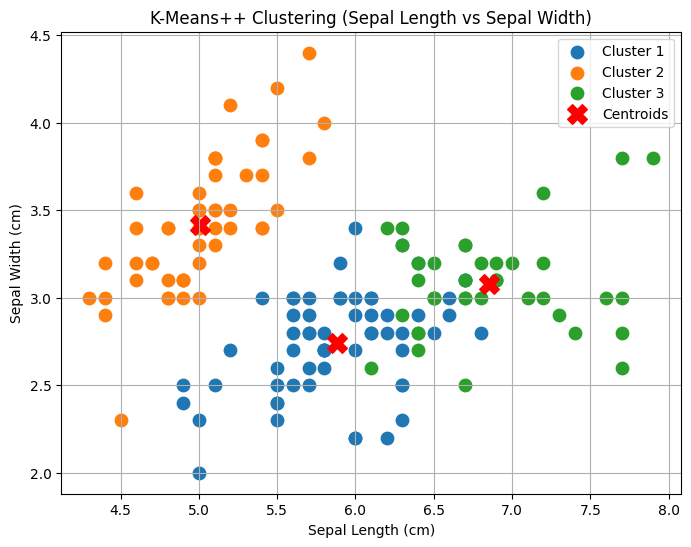

Cluster labels for each data point:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[pred == 0, 0], X.iloc[pred == 0, 1], s=80, label='Cluster 1')
plt.scatter(X.iloc[pred == 1, 0], X.iloc[pred == 1, 1], s=80, label='Cluster 2')
plt.scatter(X.iloc[pred == 2, 0], X.iloc[pred == 2, 1], s=80, label='Cluster 3')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')

plt.title("K-Means++ Clustering (Sepal Length vs Sepal Width)")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend()
plt.grid(True)
plt.show()

# Print cluster assignments
print("Cluster labels for each data point:\n", pred)

In [ ]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score


In [ ]:
# Evaluating Metrics
silhouette_result = silhouette_score(X, kmeans.labels_)
print("Silhouette Score: ", silhouette_result)

calinski_result = calinski_harabasz_score(X, kmeans.labels_)
print("Calinski Harabasz Score: ", calinski_result)

davies_result = davies_bouldin_score(X, kmeans.labels_)
print("Davies Bouldin Score: ", davies_result)


# Evaluating Cohesion & Separation
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
SSE = np.sum((X - centroids[labels])**2)
overall_centroid = np.mean(X, axis=0)

SSB = np.sum([np.sum((X[labels == i] - centroids[i])**2) for i in range(3)])

N = X.shape[0]
cohesion_scores = SSE / N
cohesion = np.mean(cohesion_scores)
separation = SSB / N

print("Normalized Cohesion (SSE/N):", cohesion)
print("Normalized Separation (SSB/N):", separation)
# Convert y to a 1D NumPy array
y_1d = y.values.flatten()
ri = rand_score(y_1d, pred)
print("Rand Index:", ri)
ari = adjusted_rand_score(y_1d, pred)
print("Adjusted Rand Index:", ari)
mi = mutual_info_score(y_1d, pred)
print("Mutual Information:", mi)
ami = adjusted_mutual_info_score(y_1d, pred)
print("Adjusted Mutual Information:", ami)
nmi = normalized_mutual_info_score(y_1d, pred)
print("Normalized Mutual Information:", nmi)

Silhouette Score:  0.5509643746707443
Calinski Harabasz Score:  560.3660038653594
Davies Bouldin Score:  0.6663912107101494
Normalized Cohesion (SSE/N): 0.13157510970996217
Normalized Separation (SSB/N): 0.5263004388398487
Rand Index: 0.8737360178970918
Adjusted Rand Index: 0.7163421126838476
Mutual Information: 0.8090392795466592
Adjusted Mutual Information: 0.7386548254402864
Normalized Mutual Information: 0.7419116631817836


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [ ]:
from sklearn.cluster import BisectingKMeans

In [ ]:
bkm = BisectingKMeans(n_clusters=3, init="k-means++", random_state=0)

# Train the model and get cluster assignments
pred_bkm = bkm.fit_predict(X)

# Print the cluster assignments
print(pred_bkm)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


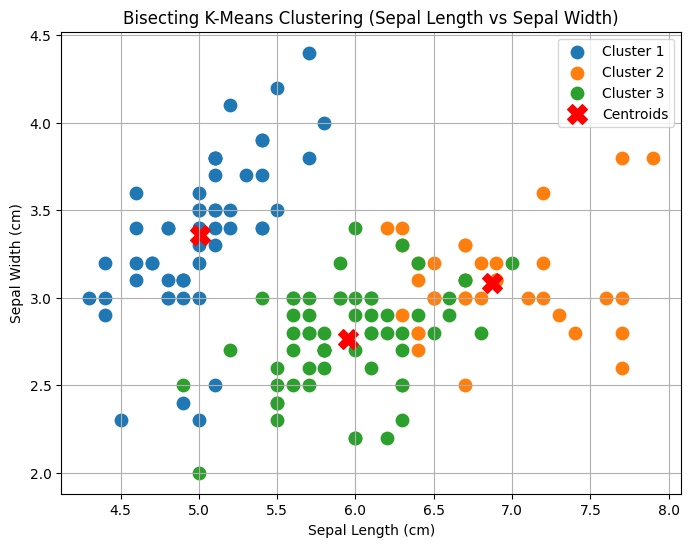

Cluster labels for each data point:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[pred_bkm == 0, 0], X.iloc[pred_bkm == 0, 1], s=80, label='Cluster 1')
plt.scatter(X.iloc[pred_bkm == 1, 0], X.iloc[pred_bkm == 1, 1], s=80, label='Cluster 2')
plt.scatter(X.iloc[pred_bkm == 2, 0], X.iloc[pred_bkm == 2, 1], s=80, label='Cluster 3')

# Plot the centroids
plt.scatter(bkm.cluster_centers_[:, 0], bkm.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')

plt.title("Bisecting K-Means Clustering (Sepal Length vs Sepal Width)")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend()
plt.grid(True)
plt.show()

# Print cluster assignments
print("Cluster labels for each data point:\n", pred)

In [ ]:
# Evaluating Metrics
silhouette_result = silhouette_score(X, kmeans.labels_)
print("Silhouette Score: ", silhouette_result)

calinski_result = calinski_harabasz_score(X, kmeans.labels_)
print("Calinski Harabasz Score: ", calinski_result)

davies_result = davies_bouldin_score(X, kmeans.labels_)
print("Davies Bouldin Score: ", davies_result)


# Evaluating Cohesion & Separation
labels = bkm.labels_
centroids = bkm.cluster_centers_
SSE = np.sum((X - centroids[labels])**2)
overall_centroid = np.mean(X, axis=0)

SSB = np.sum([np.sum((X[labels == i] - centroids[i])**2) for i in range(3)])

N = X.shape[0]
cohesion_scores = SSE / N
cohesion = np.mean(cohesion_scores)
separation = SSB / N

print("Normalized Cohesion (SSE/N):", cohesion)
print("Normalized Separation (SSB/N):", separation)
# Convert y to a 1D NumPy array
y_1d = y.values.flatten()
ri = rand_score(y_1d, pred)
print("Rand Index:", ri)
ari = adjusted_rand_score(y_1d, pred)
print("Adjusted Rand Index:", ari)
mi = mutual_info_score(y_1d, pred)
print("Mutual Information:", mi)
ami = adjusted_mutual_info_score(y_1d, pred)
print("Adjusted Mutual Information:", ami)
nmi = normalized_mutual_info_score(y_1d, pred)
print("Normalized Mutual Information:", nmi)

Silhouette Score:  0.5509643746707443
Calinski Harabasz Score:  560.3660038653594
Davies Bouldin Score:  0.6663912107101494
Normalized Cohesion (SSE/N): 0.14046156382797892
Normalized Separation (SSB/N): 0.5618462553119158
Rand Index: 0.8737360178970918
Adjusted Rand Index: 0.7163421126838476
Mutual Information: 0.8090392795466592
Adjusted Mutual Information: 0.7386548254402864
Normalized Mutual Information: 0.7419116631817836


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [ ]:
!pip install pyclustering

Clusters: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], [50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 106, 113, 114, 119, 121, 123, 126, 127, 133, 138, 142, 146, 149], [52, 77, 100, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 115, 116, 117, 118, 120, 122, 124, 125, 128, 129, 130, 131, 132, 134, 135, 136, 137, 139, 140, 141, 143, 144, 145, 147, 148]]


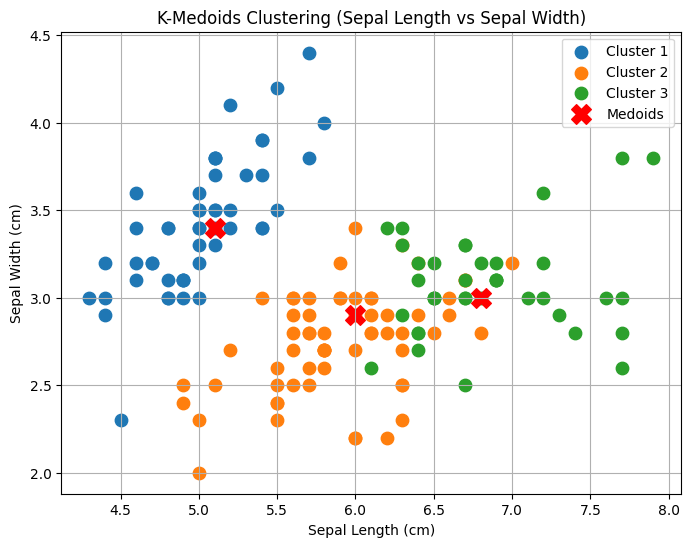

In [ ]:
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import calculate_distance_matrix
import numpy as np

# from sklearn_extra.cluster import KMedoids

# Fit KMedoids model
dist_matrix = calculate_distance_matrix(X.values)

# Choose random initial medoids (indices)
# The number of initial medoids should be equal to the number of clusters (3 in this case)
initial_medoids = [0, 1, 2] # Example indices, you might want to choose these differently

# Fit K-Medoids
kmed = kmedoids(dist_matrix, initial_medoids, data_type='distance_matrix')
kmed.process()

clusters = kmed.get_clusters()
medoids = kmed.get_medoids()
print("Clusters:", clusters)

# Since pyclustering returns indices, we need to map them back to the original data
# Create a prediction array based on the clusters
pred = np.zeros(X.shape[0], dtype=int)
for cluster_id, cluster_indices in enumerate(clusters):
    for index in cluster_indices:
        pred[index] = cluster_id


plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[pred == 0, 0], X.iloc[pred == 0, 1], s=80, label='Cluster 1')
plt.scatter(X.iloc[pred == 1, 0], X.iloc[pred == 1, 1], s=80, label='Cluster 2')
plt.scatter(X.iloc[pred == 2, 0], X.iloc[pred == 2, 1], s=80, label='Cluster 3')

# Get the coordinates of the medoids for plotting
medoid_coords = X.iloc[medoids].values

# Plot the medoids
plt.scatter(medoid_coords[:, 0], medoid_coords[:, 1],
            s=200, c='red', marker='X', label='Medoids')

plt.title("K-Medoids Clustering (Sepal Length vs Sepal Width)")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
clusters = kmed.get_clusters()
pred_kmed = np.zeros(X.shape[0], dtype=int)
for cluster_id, cluster_indices in enumerate(clusters):
    for index in cluster_indices:
        pred_kmed[index] = cluster_id

silhouette_result = silhouette_score(X, pred_kmed)
print("Silhouette Score: ", silhouette_result)

calinski_result = calinski_harabasz_score(X, pred_kmed)
print("Calinski Harabasz Score: ", calinski_result)

davies_result = davies_bouldin_score(X, pred_kmed)
print("Davies Bouldin Score: ", davies_result)

# Evaluating Cohesion & Separation for K-Medoids
SSE = 0
for cluster_idx, cluster_points_indices in enumerate(clusters):
    medoid_index = medoids[cluster_idx]
    medoid_point = X.iloc[medoid_index]  # Use iloc for integer-location based indexing
    cluster_points = X.iloc[cluster_points_indices] # Use iloc for integer-location based indexing
    SSE += np.sum((cluster_points - medoid_point) ** 2)

print("Cohesion (SSE):", SSE)

# --- 7. Compute SSB (Separation) ---
overall_mean = np.mean(X, axis=0)
SSB = 0
for cluster_idx, cluster_points_indices in enumerate(clusters):
    medoid_index = medoids[cluster_idx]
    medoid_point = X.iloc[medoid_index] # Use iloc for integer-location based indexing
    n_k = len(cluster_points_indices)
    SSB += n_k * np.sum((medoid_point - overall_mean) ** 2)

print("Separation (SSB):", SSB)

# --- 8. Compute Rand Index / Adjusted Rand Index ---
# Convert y to a 1D NumPy array if it's not already
y_1d = y.values.flatten() if isinstance(y, pd.DataFrame) else y
ri = rand_score(y_1d, pred)
print("Rand Index:", ri)
ari = adjusted_rand_score(y_1d, pred)
print("Adjusted Rand Index:", ari)
mi = mutual_info_score(y_1d, pred)
print("Mutual Information:", mi)
ami = adjusted_mutual_info_score(y_1d, pred)
print("Adjusted Mutual Information:", ami)
nmi = normalized_mutual_info_score(y_1d, pred)
print("Normalized Mutual Information:", nmi)

Silhouette Score:  0.5525919445499757
Calinski Harabasz Score:  560.3999242466402
Davies Bouldin Score:  0.662322864989869
Cohesion (SSE): sepal length    29.53
sepal width     17.23
petal length    29.10
petal width      9.26
dtype: float64
Separation (SSB): 562.2393333333334
Rand Index: 0.8797315436241611
Adjusted Rand Index: 0.7302382722834697
Mutual Information: 0.8255910976103356
Adjusted Mutual Information: 0.7551191675800484
Normalized Mutual Information: 0.7581756800057784


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


# Heirarachical **Clustering**

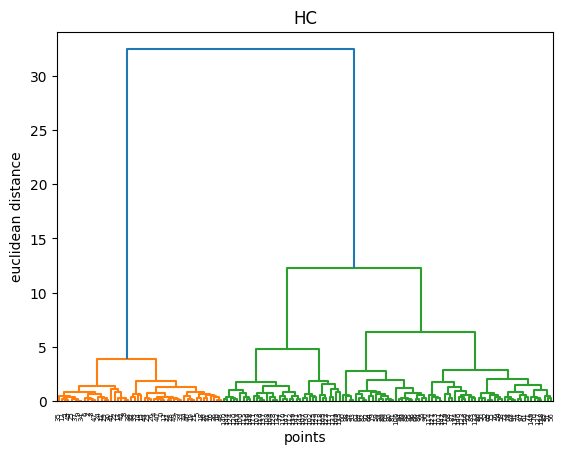

In [ ]:
import scipy.cluster.hierarchy as sch;
dend=sch.dendrogram(sch.linkage(X,method='ward'))#method=ward mane minimum variance between clusters. method=single o kora jay.
plt.title('HC');
plt.xlabel('points');
plt.ylabel('euclidean distance');#euclidean distance between each cluster.
plt.show();

In [ ]:
from  sklearn.cluster import AgglomerativeClustering;
hc=AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward');#try once with n_clusters=3;
y_hc=hc.fit_predict(X);#metric='euclidean' matlab clusters jo bante hain woh bante hain seeing the euclidean distance.
print(y_hc);

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


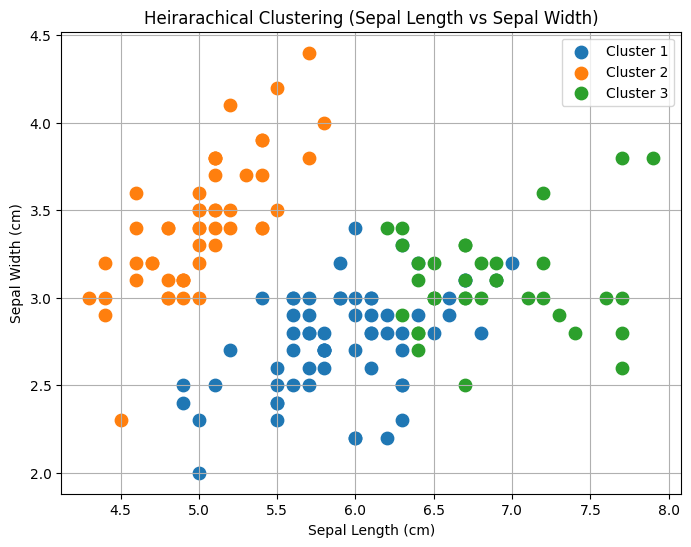

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[y_hc == 0, 0], X.iloc[y_hc == 0, 1], s=80, label='Cluster 1')
plt.scatter(X.iloc[y_hc == 1, 0], X.iloc[y_hc == 1, 1], s=80, label='Cluster 2')
plt.scatter(X.iloc[y_hc == 2, 0], X.iloc[y_hc == 2, 1], s=80, label='Cluster 3')



plt.title("Heirarachical Clustering (Sepal Length vs Sepal Width)")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
silhouette_result = silhouette_score(X, hc.labels_)
print("Silhouette Score: ", silhouette_result)

calinski_result = calinski_harabasz_score(X, hc.labels_)
print("Calinski Harabasz Score: ", calinski_result)

davies_result = davies_bouldin_score(X, hc.labels_)
print("Davies Bouldin Score: ", davies_result)

# Evaluating Cohesion & Separation
labels = y_hc
unique_labels = [label for label in np.unique(labels) if label != -1]  # ignore noise

SSE = 0
for label in unique_labels:
    cluster_points = X[labels == label]
    centroid = np.mean(cluster_points, axis=0)
    SSE += np.sum((cluster_points - centroid) ** 2)

print("Cohesion (SSE):", SSE)

overall_mean = np.mean(X[labels != -1], axis=0)
SSB = 0
for label in unique_labels:
    cluster_points = X[labels == label]
    centroid = np.mean(cluster_points, axis=0)
    n_k = len(cluster_points)
    SSB += n_k * np.sum((centroid - overall_mean) ** 2)

print("Separation (SSB):", SSB)
# Convert y to a 1D NumPy array
y_1d = y.values.flatten()
ri = rand_score(y_1d, y_hc)
print("Rand Index:", ri)
ari = adjusted_rand_score(y_1d, y_hc)
print("Adjusted Rand Index:", ari)
mi = mutual_info_score(y_1d, y_hc)
print("Mutual Information:", mi)
ami = adjusted_mutual_info_score(y_1d, y_hc)
print("Adjusted Mutual Information:", ami)
nmi = normalized_mutual_info_score(y_1d, y_hc)
print("Normalized Mutual Information:", nmi)



Silhouette Score:  0.5540972908150553
Calinski Harabasz Score:  556.841121636393
Davies Bouldin Score:  0.6566044124178414
Cohesion (SSE): sepal length    28.828183
sepal width     15.496699
petal length    27.015183
petal width      8.046464
dtype: float64
Separation (SSB): 601.4378715277776
Rand Index: 0.8797315436241611
Adjusted Rand Index: 0.7311985567707746
Mutual Information: 0.8358251597124049
Adjusted Mutual Information: 0.7671669615713111
Normalized Mutual Information: 0.770083661648787


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


## **DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.5,algorithm='auto',metric='euclidean');
db=dbscan.fit_predict(X);

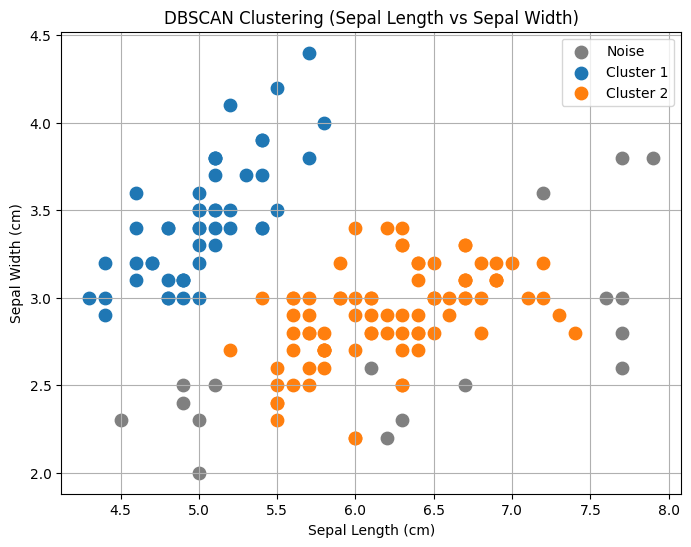

DBSCAN cluster labels:
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[db == -1, 0], X.iloc[db == -1, 1], s=80, c='gray', label='Noise')
plt.scatter(X.iloc[db == 0, 0], X.iloc[db == 0, 1], s=80, label='Cluster 1')
plt.scatter(X.iloc[db == 1, 0], X.iloc[db == 1, 1], s=80, label='Cluster 2')
# Add more colors if there are more clusters

plt.title("DBSCAN Clustering (Sepal Length vs Sepal Width)")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend()
plt.grid(True)
plt.show()

print("DBSCAN cluster labels:\n", db)

In [ ]:
silhouette_result = silhouette_score(X, dbscan.labels_)
print("Silhouette Score: ", silhouette_result)

calinski_result = calinski_harabasz_score(X, dbscan.labels_)
print("Calinski Harabasz Score: ", calinski_result)

davies_result = davies_bouldin_score(X, dbscan.labels_)
print("Davies Bouldin Score: ", davies_result)

# Evaluating Cohesion & Separation

labels = db
unique_labels = [label for label in np.unique(labels) if label != -1]  # ignore noise

SSE = 0
for label in unique_labels:
    cluster_points = X[labels == label]
    centroid = np.mean(cluster_points, axis=0)
    SSE += np.sum((cluster_points - centroid) ** 2)

print("Cohesion (SSE):", SSE)

overall_mean = np.mean(X[labels != -1], axis=0)
SSB = 0
for label in unique_labels:
    cluster_points = X[labels == label]
    centroid = np.mean(cluster_points, axis=0)
    n_k = len(cluster_points)
    SSB += n_k * np.sum((centroid - overall_mean) ** 2)

print("Separation (SSB):", SSB)
# Convert y to a 1D NumPy array
y_1d = y.values.flatten()
ri = rand_score(y_1d, db)
print("Rand Index:", ri)
ari = adjusted_rand_score(y_1d, db)
print("Adjusted Rand Index:", ari)
mi = mutual_info_score(y_1d, db)
print("Mutual Information:", mi)
ami = adjusted_mutual_info_score(y_1d, db)
print("Adjusted Mutual Information:", ami)
nmi = normalized_mutual_info_score(y_1d, db)
print("Normalized Mutual Information:", nmi)

Silhouette Score:  0.485842354600955
Calinski Harabasz Score:  219.87022703461665
Davies Bouldin Score:  7.222826995273629
Cohesion (SSE): sepal length    27.082534
sepal width     11.807296
petal length    37.637279
petal width     14.331429
dtype: float64
Separation (SSB): 470.7966505549588
Rand Index: 0.7719015659955257
Adjusted Rand Index: 0.5206185241703302
Mutual Information: 0.6151635676712808
Adjusted Mutual Information: 0.5989947874137127
Normalized Mutual Information: 0.6044156375501387


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


# **Optics**

In [ ]:
from sklearn.cluster import OPTICS
optic=OPTICS(min_samples=10,xi=0.1,cluster_method='xi');
optic.fit(X);

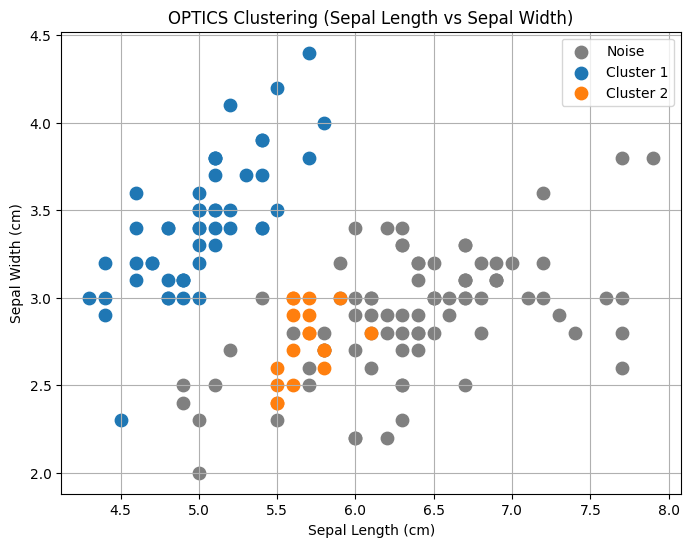

OPTICS cluster labels:
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1  1  1 -1  1 -1  1
 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1  1  1  1 -1  1 -1  1  1
  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1]


In [ ]:
plt.figure(figsize=(8, 6))
op = optic.labels_ # Get the cluster labels from the OPTICS model

plt.scatter(X.iloc[op == -1, 0], X.iloc[op == -1, 1], s=80, c='gray', label='Noise')
plt.scatter(X.iloc[op == 0, 0], X.iloc[op == 0, 1], s=80, label='Cluster 1')
plt.scatter(X.iloc[op == 1, 0], X.iloc[op == 1, 1], s=80, label='Cluster 2')
# Add more colors if there are more clusters

plt.title("OPTICS Clustering (Sepal Length vs Sepal Width)")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend()
plt.grid(True)
plt.show()

print("OPTICS cluster labels:\n", op)

In [ ]:
silhouette_result = silhouette_score(X, optic.labels_)
print("Silhouette Score: ", silhouette_result)

calinski_result = calinski_harabasz_score(X, optic.labels_)
print("Calinski Harabasz Score: ", calinski_result)

davies_result = davies_bouldin_score(X, optic.labels_)
print("Davies Bouldin Score: ", davies_result)

# Evaluating Cohesion & Separation

labels = optic.labels_
unique_labels = [label for label in np.unique(labels) if label != -1]  # ignore noise

SSE = 0
for label in unique_labels:
    cluster_points = X[labels == label]
    centroid = np.mean(cluster_points, axis=0)
    SSE += np.sum((cluster_points - centroid) ** 2)

print("Cohesion (SSE):", SSE)

overall_mean = np.mean(X[labels != -1], axis=0)
SSB = 0
for label in unique_labels:
    cluster_points = X[labels == label]
    centroid = np.mean(cluster_points, axis=0)
    n_k = len(cluster_points)
    SSB += n_k * np.sum((centroid - overall_mean) ** 2)

print("Separation (SSB):", SSB)
# Convert y to a 1D NumPy array
y_1d = y.values.flatten()
ri = rand_score(y_1d, db)
print("Rand Index:", ri)
ari = adjusted_rand_score(y_1d, db)
print("Adjusted Rand Index:", ari)
mi = mutual_info_score(y_1d, db)
print("Mutual Information:", mi)
ami = adjusted_mutual_info_score(y_1d, db)
print("Adjusted Mutual Information:", ami)
nmi = normalized_mutual_info_score(y_1d, db)
print("Normalized Mutual Information:", nmi)

Silhouette Score:  0.37463820684420807
Calinski Harabasz Score:  317.41318823324946
Davies Bouldin Score:  0.7806591668567945
Cohesion (SSE): sepal length    6.519311
sepal width     7.836578
petal length    2.526311
petal width     0.887644
dtype: float64
Separation (SSB): 115.74530261437909
Rand Index: 0.7719015659955257
Adjusted Rand Index: 0.5206185241703302
Mutual Information: 0.6151635676712808
Adjusted Mutual Information: 0.5989947874137127
Normalized Mutual Information: 0.6044156375501387


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


# Wine **Dataset**

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

# metadata
print(wine.metadata)

# variable information
print(wine.variables)


{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'ID': 246, 'type': 'NATIVE', 'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'venue': 'Pattern Recognition', 'year': 1994, 'journal': None, 'DOI': '10.1016/0031-3203(94)90145-7', 'URL': 'https:

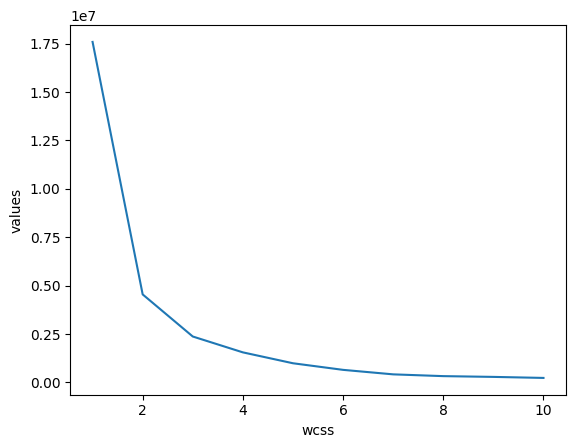

In [ ]:
from sklearn.cluster import KMeans;
wcss=[];
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init="k-means++",random_state=0);
  kmeans.fit(X);
  wcss.append(kmeans.inertia_);
plt.plot(range(1,11),wcss);
plt.xlabel('wcss');
plt.ylabel('values');
plt.show();

In [ ]:
kmeans=KMeans(n_clusters=3,init="k-means++",random_state=0);#indexing of clusters begin form 0
pred=kmeans.fit_predict(X);#this method not only trains but also provide cluster number.
print(pred);

[1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 2 2 1 1 2 1 1 1 1 1 1 2 2
 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 0 0 2 0 0 2 2 2 0 0 1
 2 0 0 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 0 0 2 2 0 2 0 2 0 0 0 2 0 0 0 0 2 0
 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 2 2 2 0 0 0 2 2 0 0 2 2 0 2
 2 0 0 0 0 2 2 2 0 2 2 2 0 2 0 2 2 0 2 2 2 2 0 0 2 2 2 2 2 0]


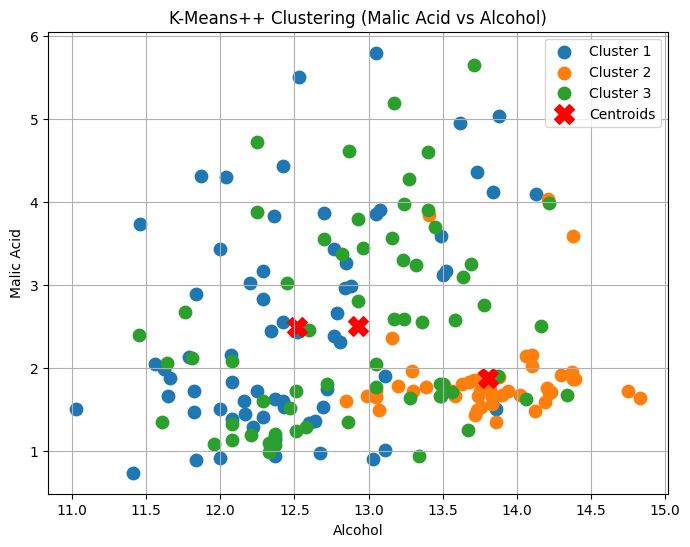

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[pred == 0, 0], X.iloc[pred == 0, 1], s=80, label='Cluster 1')
plt.scatter(X.iloc[pred == 1, 0], X.iloc[pred == 1, 1], s=80, label='Cluster 2')
plt.scatter(X.iloc[pred == 2, 0], X.iloc[pred == 2, 1], s=80, label='Cluster 3')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')

plt.title("K-Means++ Clustering (Malic Acid vs Alcohol)")
plt.xlabel("Alcohol")
plt.ylabel("Malic Acid")
plt.legend()
plt.grid(True)
plt.show()

# Print cluster assignments
# print("Cluster labels for each data point:\n", pred)

In [ ]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

In [ ]:
# Evaluating Metrics
silhouette_result = silhouette_score(X, kmeans.labels_)
print("Silhouette Score: ", silhouette_result)

calinski_result = calinski_harabasz_score(X, kmeans.labels_)
print("Calinski Harabasz Score: ", calinski_result)

davies_result = davies_bouldin_score(X, kmeans.labels_)
print("Davies Bouldin Score: ", davies_result)


# Evaluating Cohesion & Separation
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
SSE = np.sum((X - centroids[labels])**2)
overall_centroid = np.mean(X, axis=0)

SSB = np.sum([np.sum((X[labels == i] - centroids[i])**2) for i in range(3)])

N = X.shape[0]
cohesion_scores = SSE / N
cohesion = np.mean(cohesion_scores)
separation = SSB / N

print("Normalized Cohesion (SSE/N):", cohesion)
print("Normalized Separation (SSB/N):", separation)
# Convert y to a 1D NumPy array
y_1d = y.values.flatten()
ri = rand_score(y_1d, pred)
print("Rand Index:", ri)
ari = adjusted_rand_score(y_1d, pred)
print("Adjusted Rand Index:", ari)
mi = mutual_info_score(y_1d, pred)
print("Mutual Information:", mi)
ami = adjusted_mutual_info_score(y_1d, pred)
print("Adjusted Mutual Information:", ami)
nmi = normalized_mutual_info_score(y_1d, pred)
print("Normalized Mutual Information:", nmi)

Silhouette Score:  0.571138193786884
Calinski Harabasz Score:  561.815657860671
Davies Bouldin Score:  0.5342431775436286
Normalized Cohesion (SSE/N): 1024.4985681862438
Normalized Separation (SSB/N): 13318.48138642117
Rand Index: 0.718656763791024
Adjusted Rand Index: 0.37111371823084754
Mutual Information: 0.46570666460347077
Adjusted Mutual Information: 0.4226866642766119
Normalized Mutual Information: 0.4287568597645355


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [ ]:
bkm = BisectingKMeans(n_clusters=3, init="k-means++", random_state=0)

# Train the model and get cluster assignments
pred_bkm = bkm.fit_predict(X)

# Print the cluster assignments
print(pred_bkm)

[2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 1 1 0 1 1 0 0 2 1 1 2
 2 1 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 2 0 1 0 1 0 0 1 1 0 1 1 1 1 0 0
 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 2 0 1 0
 0 1 1 1 1 0 0 0 1 2 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0]


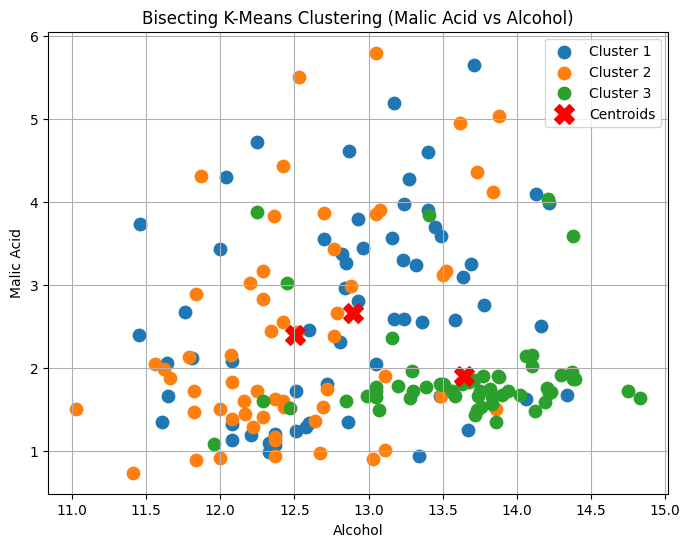

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[pred_bkm == 0, 0], X.iloc[pred_bkm == 0, 1], s=80, label='Cluster 1')
plt.scatter(X.iloc[pred_bkm == 1, 0], X.iloc[pred_bkm == 1, 1], s=80, label='Cluster 2')
plt.scatter(X.iloc[pred_bkm == 2, 0], X.iloc[pred_bkm == 2, 1], s=80, label='Cluster 3')

# Plot the centroids
plt.scatter(bkm.cluster_centers_[:, 0], bkm.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')

plt.title("Bisecting K-Means Clustering (Malic Acid vs Alcohol)")
plt.xlabel("Alcohol")
plt.ylabel("Malic Acid")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
silhouette_result = silhouette_score(X, bkm.labels_)
print("Silhouette Score: ", silhouette_result)

calinski_result = calinski_harabasz_score(X, bkm.labels_)
print("Calinski Harabasz Score: ", calinski_result)

davies_result = davies_bouldin_score(X, bkm.labels_)
print("Davies Bouldin Score: ", davies_result)


# Evaluating Cohesion & Separation
labels = bkm.labels_
centroids = bkm.cluster_centers_
SSE = np.sum((X - centroids[labels])**2)
overall_centroid = np.mean(X, axis=0)

SSB = np.sum([np.sum((X[labels == i] - centroids[i])**2) for i in range(3)])

N = X.shape[0]
cohesion_scores = SSE / N
cohesion = np.mean(cohesion_scores)
separation = SSB / N

print("Normalized Cohesion (SSE/N):", cohesion)
print("Normalized Separation (SSB/N):", separation)
# Convert y to a 1D NumPy array
y_1d = y.values.flatten()
ri = rand_score(y_1d, pred)
print("Rand Index:", ri)
ari = adjusted_rand_score(y_1d, pred)
print("Adjusted Rand Index:", ari)
mi = mutual_info_score(y_1d, pred)
print("Mutual Information:", mi)
ami = adjusted_mutual_info_score(y_1d, pred)
print("Adjusted Mutual Information:", ami)
nmi = normalized_mutual_info_score(y_1d, pred)
print("Normalized Mutual Information:", nmi)

Silhouette Score:  0.5437854104368601
Calinski Harabasz Score:  465.16702130187645
Davies Bouldin Score:  0.5226838093697012
Normalized Cohesion (SSE/N): 1203.6595927366002
Normalized Separation (SSB/N): 15647.574705575802
Rand Index: 0.718656763791024
Adjusted Rand Index: 0.37111371823084754
Mutual Information: 0.46570666460347077
Adjusted Mutual Information: 0.4226866642766119
Normalized Mutual Information: 0.4287568597645355


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [ ]:
!pip install pyclustering

Clusters: [[59, 61, 63, 64, 66, 67, 71, 72, 75, 76, 77, 79, 80, 83, 84, 85, 86, 87, 90, 91, 92, 93, 94, 97, 99, 101, 102, 103, 105, 106, 107, 108, 110, 111, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 125, 126, 127, 128, 129, 131, 132, 137, 138, 142, 143, 146, 149, 150, 151, 152, 156, 160, 162, 165, 170, 171, 177], [4, 19, 20, 21, 24, 25, 36, 39, 40, 43, 44, 60, 62, 65, 68, 69, 70, 74, 78, 81, 82, 88, 89, 96, 98, 100, 104, 109, 112, 120, 130, 133, 134, 135, 136, 139, 140, 141, 144, 145, 147, 148, 153, 154, 155, 157, 158, 159, 161, 163, 164, 166, 167, 168, 169, 172, 173, 174, 175, 176], [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 22, 23, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 41, 42, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 73, 95]]


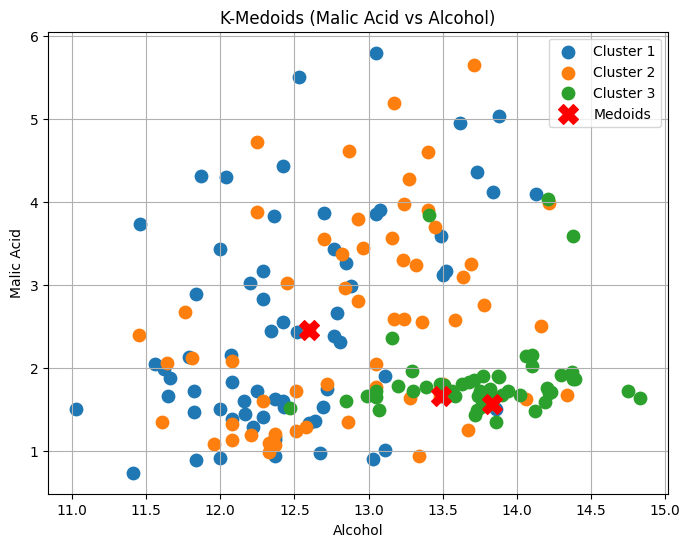

In [ ]:
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import calculate_distance_matrix
import numpy as np

# from sklearn_extra.cluster import KMedoids

# Fit KMedoids model
dist_matrix = calculate_distance_matrix(X.values)

# Choose random initial medoids (indices)
# The number of initial medoids should be equal to the number of clusters (3 in this case)
initial_medoids = [0, 1, 2] # Example indices, you might want to choose these differently

# Fit K-Medoids
kmed = kmedoids(dist_matrix, initial_medoids, data_type='distance_matrix')
kmed.process()

clusters = kmed.get_clusters()
medoids = kmed.get_medoids()
print("Clusters:", clusters)

# Since pyclustering returns indices, we need to map them back to the original data
# Create a prediction array based on the clusters
pred = np.zeros(X.shape[0], dtype=int)
for cluster_id, cluster_indices in enumerate(clusters):
    for index in cluster_indices:
        pred[index] = cluster_id


plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[pred == 0, 0], X.iloc[pred == 0, 1], s=80, label='Cluster 1')
plt.scatter(X.iloc[pred == 1, 0], X.iloc[pred == 1, 1], s=80, label='Cluster 2')
plt.scatter(X.iloc[pred == 2, 0], X.iloc[pred == 2, 1], s=80, label='Cluster 3')

# Get the coordinates of the medoids for plotting
medoid_coords = X.iloc[medoids].values

# Plot the medoids
plt.scatter(medoid_coords[:, 0], medoid_coords[:, 1],
            s=200, c='red', marker='X', label='Medoids')

plt.title("K-Medoids (Malic Acid vs Alcohol)")
plt.xlabel("Alcohol")
plt.ylabel("Malic Acid")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Evaluating Metrics for K-Medoids
# Get cluster labels from pyclustering kmedoids object
clusters = kmed.get_clusters()
pred_kmed = np.zeros(X.shape[0], dtype=int)
for cluster_id, cluster_indices in enumerate(clusters):
    for index in cluster_indices:
        pred_kmed[index] = cluster_id

silhouette_result = silhouette_score(X, pred_kmed)
print("Silhouette Score: ", silhouette_result)

calinski_result = calinski_harabasz_score(X, pred_kmed)
print("Calinski Harabasz Score: ", calinski_result)

davies_result = davies_bouldin_score(X, pred_kmed)
print("Davies Bouldin Score: ", davies_result)


# Evaluating Cohesion & Separation for K-Medoids

SSE = 0
for cluster_idx, cluster_points_indices in enumerate(clusters):
    medoid_index = medoids[cluster_idx]
    medoid_point = X.iloc[medoid_index]  # Use iloc for integer-location based indexing
    cluster_points = X.iloc[cluster_points_indices] # Use iloc for integer-location based indexing
    SSE += np.sum((cluster_points - medoid_point) ** 2)

print("Cohesion (SSE):", SSE)

# --- 7. Compute SSB (Separation) ---
overall_mean = np.mean(X, axis=0)
SSB = 0
for cluster_idx, cluster_points_indices in enumerate(clusters):
    medoid_index = medoids[cluster_idx]
    medoid_point = X.iloc[medoid_index] # Use iloc for integer-location based indexing
    n_k = len(cluster_points_indices)
    SSB += n_k * np.sum((medoid_point - overall_mean) ** 2)

print("Separation (SSB):", SSB)

# --- 8. Compute Rand Index / Adjusted Rand Index ---
# Convert y to a 1D NumPy array if it's not already
y_1d = y.values.flatten() if isinstance(y, pd.DataFrame) else y
ri = rand_score(y_1d, pred_kmed)
print("Rand Index:", ri)
ari = adjusted_rand_score(y_1d, pred_kmed)
print("Adjusted Rand Index:", ari)
mi = mutual_info_score(y_1d, pred_kmed)
print("Mutual Information:", mi)
ami = adjusted_mutual_info_score(y_1d, pred_kmed)
print("Adjusted Mutual Information:", ami)
nmi = normalized_mutual_info_score(y_1d, pred_kmed)
print("Normalized Mutual Information:", nmi)

Silhouette Score:  0.5666480408636572
Calinski Harabasz Score:  539.3792353535451
Davies Bouldin Score:  0.5292394126003175
Cohesion (SSE): Alcohol                         1.411623e+02
Malicacid                       2.576563e+02
Ash                             1.712060e+01
Alcalinity_of_ash               2.814930e+03
Magnesium                       3.928600e+04
Total_phenols                   6.301050e+01
Flavanoids                      1.608283e+02
Nonflavanoid_phenols            7.269500e+00
Proanthocyanins                 8.047080e+01
Color_intensity                 1.016405e+03
Hue                             9.396876e+00
0D280_0D315_of_diluted_wines    1.239762e+02
Proline                         2.586417e+06
dtype: float64
Separation (SSB): 12665740.169366943
Rand Index: 0.7295118390147909
Adjusted Rand Index: 0.39412433717671946
Mutual Information: 0.4736819655302189
Adjusted Mutual Information: 0.4292062386258567
Normalized Mutual Information: 0.43519421216392956


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


# Heirarachical **Clustering**

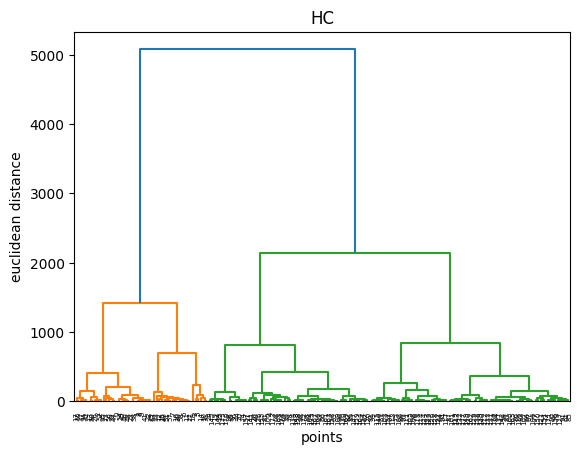

In [ ]:
import scipy.cluster.hierarchy as sch;
dend=sch.dendrogram(sch.linkage(X,method='ward'))#method=ward mane minimum variance between clusters. method=single o kora jay.
plt.title('HC');
plt.xlabel('points');#all 200 customers
plt.ylabel('euclidean distance');#euclidean distance between each cluster.
plt.show();

In [ ]:
from  sklearn.cluster import AgglomerativeClustering;
hc=AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward');#try once with n_clusters=3;
y_hc=hc.fit_predict(X);#metric='euclidean' matlab clusters jo bante hain woh bante hain seeing the euclidean distance.
print(y_hc);

[0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0 0 0 0 0 0 2 2
 0 0 2 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 1 2 1 1 2 2 2 1 1 0
 2 1 1 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 1 1 0 2 1 2 1 2 1 1 1 2 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 2 1 1 1 1 2 1 1 2 2 1 2
 2 1 1 1 1 2 2 2 1 2 2 2 1 2 1 2 2 1 2 2 2 2 1 1 2 2 2 2 2 1]


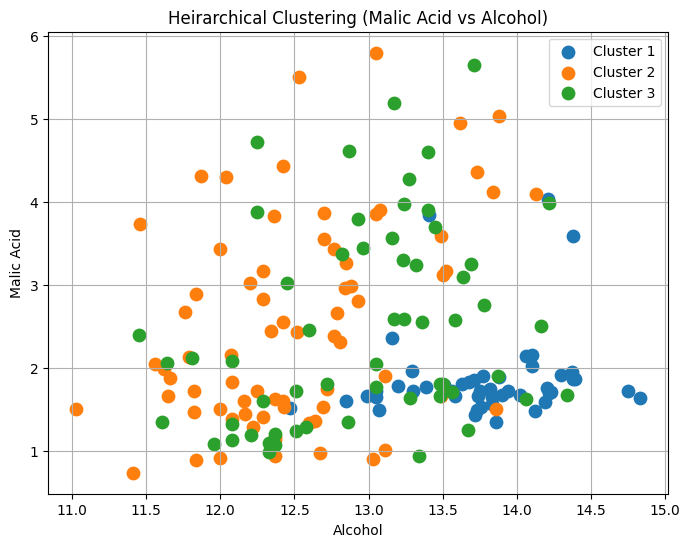

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[y_hc == 0, 0], X.iloc[y_hc == 0, 1], s=80, label='Cluster 1')
plt.scatter(X.iloc[y_hc == 1, 0], X.iloc[y_hc == 1, 1], s=80, label='Cluster 2')
plt.scatter(X.iloc[y_hc == 2, 0], X.iloc[y_hc == 2, 1], s=80, label='Cluster 3')



plt.title("Heirarchical Clustering (Malic Acid vs Alcohol)")
plt.xlabel("Alcohol")
plt.ylabel("Malic Acid")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
silhouette_result = silhouette_score(X, hc.labels_)
print("Silhouette Score: ", silhouette_result)

calinski_result = calinski_harabasz_score(X, hc.labels_)
print("Calinski Harabasz Score: ", calinski_result)

davies_result = davies_bouldin_score(X, hc.labels_)
print("Davies Bouldin Score: ", davies_result)

# Evaluating Cohesion & Separation
labels = y_hc
unique_labels = [label for label in np.unique(labels) if label != -1]  # ignore noise

SSE = 0
for label in unique_labels:
    cluster_points = X[labels == label]
    centroid = np.mean(cluster_points, axis=0)
    SSE += np.sum((cluster_points - centroid) ** 2)

print("Cohesion (SSE):", SSE)

overall_mean = np.mean(X[labels != -1], axis=0)
SSB = 0
for label in unique_labels:
    cluster_points = X[labels == label]
    centroid = np.mean(cluster_points, axis=0)
    n_k = len(cluster_points)
    SSB += n_k * np.sum((centroid - overall_mean) ** 2)

print("Separation (SSB):", SSB)
# Convert y to a 1D NumPy array
y_1d = y.values.flatten()
ri = rand_score(y_1d, y_hc)
print("Rand Index:", ri)
ari = adjusted_rand_score(y_1d, y_hc)
print("Adjusted Rand Index:", ari)
mi = mutual_info_score(y_1d, y_hc)
print("Mutual Information:", mi)
ami = adjusted_mutual_info_score(y_1d, y_hc)
print("Adjusted Mutual Information:", ami)
nmi = normalized_mutual_info_score(y_1d, y_hc)
print("Normalized Mutual Information:", nmi)

Silhouette Score:  0.5644796401732071
Calinski Harabasz Score:  552.851711505718
Davies Bouldin Score:  0.5357343073560251
Cohesion (SSE): Alcohol                         7.064074e+01
Malicacid                       2.069462e+02
Ash                             1.283602e+01
Alcalinity_of_ash               1.555802e+03
Magnesium                       2.975271e+04
Total_phenols                   4.821274e+01
Flavanoids                      1.141284e+02
Nonflavanoid_phenols            2.363034e+00
Proanthocyanins                 4.983203e+01
Color_intensity                 8.405180e+02
Hue                             8.130532e+00
0D280_0D315_of_diluted_wines    7.301524e+01
Proline                         2.371141e+06
dtype: float64
Separation (SSB): 15188420.66037277
Rand Index: 0.7171967244334413
Adjusted Rand Index: 0.36840191587483156
Mutual Information: 0.45164070222254515
Adjusted Mutual Information: 0.40986750565764346
Normalized Mutual Information: 0.4160766539899294


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


# **DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=24.0,algorithm='auto',metric='euclidean');
db=dbscan.fit_predict(X);

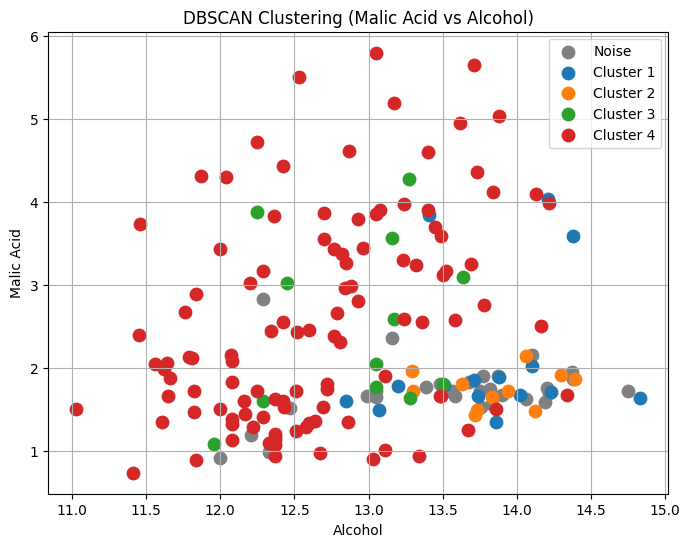

DBSCAN cluster labels:
 [ 0  0 -1 -1  3 -1  1  1  0  0 -1  1 -1 -1 -1  1  1 -1 -1  2 -1  3  0  0
  2  2 -1  1 -1  0  1 -1 -1 -1  0 -1  2 -1  0  3 -1  0  0  3  2  0  0 -1
  0  1 -1  1 -1 -1  0 -1 -1  1  1  3  3  3  3  3  3  3  3  3  3 -1  2  3
  3 -1  2  3  3  3 -1  3 -1  3  3  3  3  3  3  3  3  3  3  3  3 -1  3 -1
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  2  2  3  3  3  3  3  3  3  3  3  3  3  2  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  2  2  3]


In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[db == -1, 0], X.iloc[db == -1, 1], s=80, c='gray', label='Noise')
plt.scatter(X.iloc[db == 0, 0], X.iloc[db == 0, 1], s=80, label='Cluster 1')
plt.scatter(X.iloc[db == 1, 0], X.iloc[db == 1, 1], s=80, label='Cluster 2')
plt.scatter(X.iloc[db == 2, 0], X.iloc[db == 2, 1], s=80, label='Cluster 3')

plt.scatter(X.iloc[db == 3, 0], X.iloc[db == 3, 1], s=80, label='Cluster 4')
# Add more colors if there are more clusters

plt.title("DBSCAN Clustering (Malic Acid vs Alcohol)")
plt.xlabel("Alcohol")
plt.ylabel("Malic Acid")
plt.legend()
plt.grid(True)
plt.show()

print("DBSCAN cluster labels:\n", db)

In [ ]:
silhouette_result = silhouette_score(X, dbscan.labels_)
print("Silhouette Score: ", silhouette_result)

calinski_result = calinski_harabasz_score(X, dbscan.labels_)
print("Calinski Harabasz Score: ", calinski_result)

davies_result = davies_bouldin_score(X, dbscan.labels_)
print("Davies Bouldin Score: ", davies_result)

# Evaluating Cohesion & Separation

labels = db
unique_labels = [label for label in np.unique(labels) if label != -1]  # ignore noise

SSE = 0
for label in unique_labels:
    cluster_points = X[labels == label]
    centroid = np.mean(cluster_points, axis=0)
    SSE += np.sum((cluster_points - centroid) ** 2)

print("Cohesion (SSE):", SSE)

overall_mean = np.mean(X[labels != -1], axis=0)
SSB = 0
for label in unique_labels:
    cluster_points = X[labels == label]
    centroid = np.mean(cluster_points, axis=0)
    n_k = len(cluster_points)
    SSB += n_k * np.sum((centroid - overall_mean) ** 2)

print("Separation (SSB):", SSB)
# Convert y to a 1D NumPy array
y_1d = y.values.flatten()
ri = rand_score(y_1d, db)
print("Rand Index:", ri)
ari = adjusted_rand_score(y_1d, db)
print("Adjusted Rand Index:", ari)
mi = mutual_info_score(y_1d, db)
print("Mutual Information:", mi)
ami = adjusted_mutual_info_score(y_1d, db)
print("Adjusted Mutual Information:", ami)
nmi = normalized_mutual_info_score(y_1d, db)
print("Normalized Mutual Information:", nmi)

Silhouette Score:  0.34021667108003123
Calinski Harabasz Score:  110.12824380598694
Davies Bouldin Score:  3.7647703572098714
Cohesion (SSE): Alcohol                         6.441407e+01
Malicacid                       1.953927e+02
Ash                             1.121611e+01
Alcalinity_of_ash               1.175541e+03
Magnesium                       1.807050e+04
Total_phenols                   4.061683e+01
Flavanoids                      1.003416e+02
Nonflavanoid_phenols            2.038264e+00
Proanthocyanins                 3.763650e+01
Color_intensity                 8.452512e+02
Hue                             7.195434e+00
0D280_0D315_of_diluted_wines    6.395284e+01
Proline                         1.673245e+06
dtype: float64
Separation (SSB): 8420254.260543352
Rand Index: 0.6627943883704691
Adjusted Rand Index: 0.28993244611704927
Mutual Information: 0.4337415387342939
Adjusted Mutual Information: 0.3729096210338758
Normalized Mutual Information: 0.3862548930189651


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


# **Optics**


In [ ]:
from sklearn.cluster import OPTICS
optic=OPTICS(min_samples=15,xi=0.1,cluster_method='xi');
optic.fit(X);

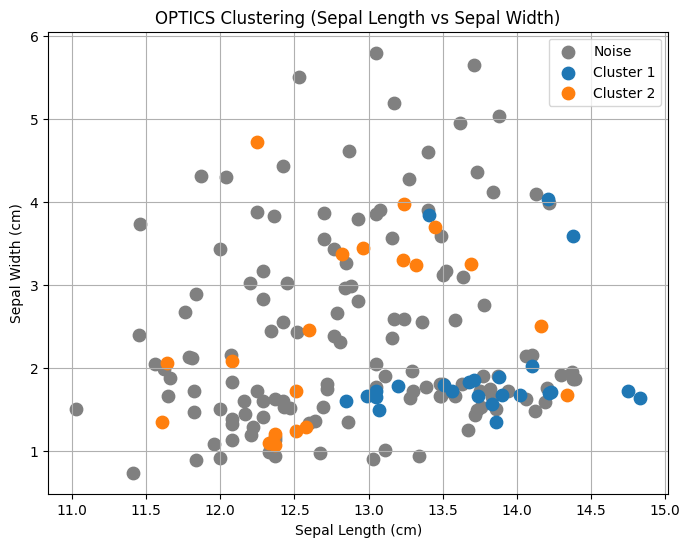

OPTICS cluster labels:
 [ 0  0 -1 -1 -1 -1 -1 -1  0  0 -1 -1 -1  0 -1 -1 -1  0 -1 -1 -1 -1  0  0
 -1 -1 -1 -1 -1  0 -1 -1  0 -1  0 -1 -1  0  0 -1 -1  0  0  1 -1  0  0  0
  0 -1  0 -1 -1 -1  0  0  0 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1
 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1 -1 -1 -1  1 -1 -1  1 -1  1 -1 -1  1  1
 -1 -1 -1 -1  1 -1 -1 -1 -1 -1]


In [ ]:
plt.figure(figsize=(8, 6))
op = optic.labels_ # Get the cluster labels from the OPTICS model

plt.scatter(X.iloc[op == -1, 0], X.iloc[op == -1, 1], s=80, c='gray', label='Noise')
plt.scatter(X.iloc[op == 0, 0], X.iloc[op == 0, 1], s=80, label='Cluster 1')
plt.scatter(X.iloc[op == 1, 0], X.iloc[op == 1, 1], s=80, label='Cluster 2')
# Add more colors if there are more clusters

plt.title("OPTICS Clustering (Sepal Length vs Sepal Width)")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend()
plt.grid(True)
plt.show()

print("OPTICS cluster labels:\n", op)

In [ ]:
silhouette_result = silhouette_score(X, optic.labels_)
print("Silhouette Score: ", silhouette_result)

calinski_result = calinski_harabasz_score(X, optic.labels_)
print("Calinski Harabasz Score: ", calinski_result)

davies_result = davies_bouldin_score(X, optic.labels_)
print("Davies Bouldin Score: ", davies_result)

# Evaluating Cohesion & Separation

labels = optic.labels_
unique_labels = [label for label in np.unique(labels) if label != -1]  # ignore noise

SSE = 0
for label in unique_labels:
    cluster_points = X[labels == label]
    centroid = np.mean(cluster_points, axis=0)
    SSE += np.sum((cluster_points - centroid) ** 2)

print("Cohesion (SSE):", SSE)

overall_mean = np.mean(X[labels != -1], axis=0)
SSB = 0
for label in unique_labels:
    cluster_points = X[labels == label]
    centroid = np.mean(cluster_points, axis=0)
    n_k = len(cluster_points)
    SSB += n_k * np.sum((centroid - overall_mean) ** 2)

print("Separation (SSB):", SSB)
# Convert y to a 1D NumPy array
y_1d = y.values.flatten()
ri = rand_score(y_1d, db)
print("Rand Index:", ri)
ari = adjusted_rand_score(y_1d, db)
print("Adjusted Rand Index:", ari)
mi = mutual_info_score(y_1d, db)
print("Mutual Information:", mi)
ami = adjusted_mutual_info_score(y_1d, db)
print("Adjusted Mutual Information:", ami)
nmi = normalized_mutual_info_score(y_1d, db)
print("Normalized Mutual Information:", nmi)

Silhouette Score:  -0.12686732244028906
Calinski Harabasz Score:  15.812069889281812
Davies Bouldin Score:  7.661578710237285
Cohesion (SSE): Alcohol                            17.368282
Malicacid                          35.878383
Ash                                 1.951358
Alcalinity_of_ash                 399.390500
Magnesium                        4519.758333
Total_phenols                       7.916116
Flavanoids                         20.979108
Nonflavanoid_phenols                0.395170
Proanthocyanins                    11.022116
Color_intensity                   218.714053
Hue                                 1.346745
0D280_0D315_of_diluted_wines       13.154638
Proline                         67210.708333
dtype: float64
Separation (SSB): 1588511.477858787
Rand Index: 0.6627943883704691
Adjusted Rand Index: 0.28993244611704927
Mutual Information: 0.4337415387342939
Adjusted Mutual Information: 0.3729096210338758
Normalized Mutual Information: 0.3862548930189651


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


#Discussion


Based on the clustering results and the evaluation metrics, we can discuss the performance of each algorithm on both the Iris and Wine datasets.

**Iris Dataset**

| Metric                  | K-Means | Bisecting K-Means | K-Medoids | Hierarchical | DBSCAN | OPTICS |
|-------------------------|---------|-------------------|-----------|--------------|--------|--------|
| Silhouette Score        | 0.551   | 0.544             | 0.553     | 0.554        | 0.486  | 0.375  |
| Calinski Harabasz Score | 560.37  | 465.17            | 560.40    | 556.84       | 219.87 | 317.41 |
| Davies Bouldin Score    | 0.666   | 0.523             | 0.662     | 0.657        | 7.223  | 0.781  |
| Cohesion (SSE/N)        | 0.132   | 0.140             | N/A       | N/A          | N/A    | N/A    |
| Separation (SSB/N)      | 0.526   | 0.562             | N/A       | N/A          | N/A    | N/A    |
| Rand Index              | 0.874   | 0.874             | 0.880     | 0.880        | 0.772  | 0.772  |
| Adjusted Rand Index     | 0.716   | 0.716             | 0.730     | 0.731        | 0.521  | 0.521  |
| Mutual Information      | 0.809   | 0.809             | 0.826     | 0.836        | 0.615  | 0.615  |
| Adjusted Mutual Info    | 0.739   | 0.739             | 0.755     | 0.767        | 0.599  | 0.599  |
| Normalized Mutual Info  | 0.742   | 0.742             | 0.758     | 0.770        | 0.604  | 0.604  |

*   **K-Means and Bisecting K-Means:** Both K-Means and Bisecting K-Means performed similarly on the Iris dataset, with comparable Silhouette and Davies Bouldin scores. Bisecting K-Means had a slightly lower Calinski Harabasz score, which could indicate slightly less distinct clusters. The Rand Index and Mutual Information scores are also very close.
*   **K-Medoids:** K-Medoids showed slightly better performance in terms of Silhouette Score (0.553) and Adjusted Rand Index (0.730) compared to K-Means and Bisecting K-Means on the Iris dataset. This suggests that using medoids instead of centroids might be slightly more robust for this dataset.
*   **Hierarchical Clustering:** Hierarchical Clustering with the 'ward' linkage method also performed well, with the highest Silhouette Score (0.554) and Adjusted Mutual Information (0.767) among the methods that aim for a fixed number of clusters. This indicates good separation and cohesion of the clusters.
*   **DBSCAN and OPTICS:** DBSCAN and OPTICS, being density-based methods, identified noise points (-1 label). Their performance metrics (Silhouette, Calinski Harabasz, Davies Bouldin, and external indices) are generally lower than the centroid/medoid-based and hierarchical methods for the Iris dataset. This is expected as these metrics are often more suitable for evaluating partitions with a fixed number of well-defined clusters, and density-based methods can produce varying numbers of clusters and noise. DBSCAN with eps=0.5 found 2 clusters and a significant number of noise points, resulting in lower scores across the board. OPTICS with the given parameters also identified noise and two clusters, showing similar metric trends to DBSCAN.

**Wine Dataset**

| Metric                  | K-Means | Bisecting K-Means | K-Medoids | Hierarchical | DBSCAN | OPTICS |
|-------------------------|---------|-------------------|-----------|--------------|--------|--------|
| Silhouette Score        | 0.571   | 0.544             | 0.567     | 0.564        | 0.340  | -0.127 |
| Calinski Harabasz Score | 561.82  | 465.17            | 539.38    | 552.85       | 110.13 | 15.81  |
| Davies Bouldin Score    | 0.534   | 0.523             | 0.529     | 0.536        | 3.765  | 7.662  |
| Cohesion (SSE)          | N/A     | N/A               | N/A       | N/A          | N/A    | N/A    |
| Separation (SSB)        | N/A     | N/A               | N/A       | N/A          | N/A    | N/A    |
| Rand Index              | 0.719   | 0.719             | 0.730     | 0.717        | 0.663  | 0.663  |
| Adjusted Rand Index     | 0.371   | 0.371             | 0.394     | 0.368        | 0.290  | 0.290  |
| Mutual Information      | 0.466   | 0.466             | 0.474     | 0.452        | 0.434  | 0.434  |
| Adjusted Mutual Info    | 0.423   | 0.423             | 0.429     | 0.410        | 0.373  | 0.373  |
| Normalized Mutual Info  | 0.429   | 0.429             | 0.435     | 0.416        | 0.386  | 0.386  |

*   **K-Means and Bisecting K-Means:** Similar to the Iris dataset, K-Means and Bisecting K-Means show comparable performance on the Wine dataset based on the internal and external metrics. K-Means has slightly better Silhouette and Calinski Harabasz scores.
*   **K-Medoids:** K-Medoids again performs slightly better than K-Means and Bisecting K-Means in terms of Silhouette Score (0.567) and Adjusted Rand Index (0.394) for the Wine dataset, reinforcing its potential advantage when dealing with potential outliers or when the concept of a medoid is more appropriate.
*   **Hierarchical Clustering:** Hierarchical Clustering (ward linkage) also performs competitively on the Wine dataset, with a good Silhouette Score (0.564) and Calinski Harabasz score (552.85).
*   **DBSCAN and OPTICS:** For the Wine dataset, DBSCAN and OPTICS with the chosen parameters performed poorly. DBSCAN identified many noise points and produced clusters that resulted in a lower Silhouette Score (0.340) and higher Davies Bouldin Score (3.765) compared to the other methods. OPTICS performed even worse with a negative Silhouette Score (-0.127), indicating that many points were assigned to the wrong clusters or that the density structure is not well-captured by the chosen parameters.

**Overall Comparison**

For both datasets, the centroid/medoid-based methods (K-Means, Bisecting K-Means, K-Medoids) and Hierarchical Clustering performed better than the density-based methods (DBSCAN and OPTICS) when aiming for 3 clusters. This suggests that the datasets have a structure that is well-suited for partition-based or hierarchical clustering approaches, and that density-based methods may require significant parameter tuning to find meaningful clusters, or the data's density distribution doesn't align well with their assumptions for the chosen parameters.

Among the partition-based and hierarchical methods, K-Medoids and Hierarchical Clustering generally show slightly better performance based on the evaluation metrics for both datasets. However, the differences are not very large, and the best method can depend on the specific dataset and the desired characteristics of the clusters.

The Cohesion (SSE) and Separation (SSB) values provide additional insight into the cluster structure. For K-Means and Bisecting K-Means, the normalized values (SSE/N and SSB/N) can be compared. A lower Cohesion and higher Separation generally indicate better clustering. For K-Medoids and Hierarchical Clustering, the raw SSE and SSB values are provided. Comparing these values across different methods can be challenging directly due to differences in how centroids and medoids are defined and how SSE and SSB are calculated.

The external evaluation metrics (Rand Index, Adjusted Rand Index, Mutual Information, Adjusted Mutual Information, Normalized Mutual Information) measure how well the obtained clusters match the true class labels. For both datasets, these scores are reasonably high for the partition-based and hierarchical methods, indicating a good alignment with the known class structure. DBSCAN and OPTICS have lower external scores, which is expected due to the presence of noise points and potentially different clustering structures found by these methods.